In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
Inventory_list = "Inventory_12_monthv2.csv"
Inventory_list_df = pd.read_csv(Inventory_list)
Inventory_list_df.head()

,Vendor Name,General Ledger Number,PO Number,RGA #,PO Class,PO Date,PO Composer,Line No,Item Number,Item Description,...,GPO Ind,Commodity Code,Received Qty,Open Qty,Order Qty,UM,Order Price,Extended Amount,Tax,Extended Amount with Tax
0,MEDLINE INDUSTRIES INC,006222063225,K232238,NaN,MEDICAL/SURGICAL SUPPLIES,06/01/2018 1:21: PM,Jessica Gorecki,1,37785,TRAY PORT DRSG CHNG - OUTPATIENT,...,NaN,27,80,0,80,EA,$5.54,$443.20,0,$443.20
1,MEDLINE INDUSTRIES INC,002999713025,K232468,NaN,INVENTORY - STORES,06/04/2018 11:20: AM,Janet Caliendo,1,37785,TRAY PORT DRSG CHNG - OUTPATIENT,...,NaN,27,2,0,2,CS,$221.60,$443.20,0,$443.20
2,MEDLINE INDUSTRIES INC,002158563225,K232550,NaN,MEDICAL/SURGICAL SUPPLIES,06/04/2018 2:12: PM,Jose Wilmer Mota,1,37785,TRAY PORT DRSG CHNG - OUTPATIENT,...,NaN,27,1,0,1,CS,$221.60,$221.60,0,$221.60
3,MEDLINE INDUSTRIES INC,002999713025,K232565,NaN,INVENTORY - STORES,06/04/2018 2:31: PM,Janet Caliendo,1,37785,TRAY PORT DRSG CHNG - OUTPATIENT,...,NaN,27,8,0,8,CS,$221.60,"$1,772.80",0,"$1,772.80"
4,MEDLINE INDUSTRIES INC,002999713025,K233037,NaN,INVENTORY - STORES,06/06/2018 11:16: AM,Janet Caliendo,1,37785,TRAY PORT DRSG CHNG - OUTPATIENT,...,NaN,27,2,0,2,CS,$221.60,$443.20,0,$443.20


In [3]:
Inventory_list_df.columns

Index(['Vendor Name', 'General Ledger Number', 'PO Number', 'RGA #',
       'PO Class', 'PO Date', 'PO Composer', 'Line No ', 'Item Number',
       'Item Description', 'Vendor Catalog Number',
       'Manufacturer \nCatalog Number', 'Status', 'Delivery Date',
       'Self Assessed', 'Requisition Number', 'GPO Ind', 'Commodity Code',
       'Received Qty', 'Open Qty', 'Order Qty', 'UM', 'Order Price',
       'Extended Amount', 'Tax', 'Extended Amount with Tax'],
      dtype='object')

In [4]:
Inventory_final_df = Inventory_list_df.loc[:, ["Vendor Name", "PO Date", "Manufacturer \nCatalog Number","Status", "UM", "Order Qty", "Order Price", "Extended Amount"]]
Inventory_final_df.head()

,Vendor Name,PO Date,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
0,MEDLINE INDUSTRIES INC,06/01/2018 1:21: PM,DYNDC2629,Complete,EA,80,$5.54,$443.20
1,MEDLINE INDUSTRIES INC,06/04/2018 11:20: AM,DYNDC2629,Complete,CS,2,$221.60,$443.20
2,MEDLINE INDUSTRIES INC,06/04/2018 2:12: PM,DYNDC2629,Complete,CS,1,$221.60,$221.60
3,MEDLINE INDUSTRIES INC,06/04/2018 2:31: PM,DYNDC2629,Complete,CS,8,$221.60,"$1,772.80"
4,MEDLINE INDUSTRIES INC,06/06/2018 11:16: AM,DYNDC2629,Complete,CS,2,$221.60,$443.20


In [5]:
group_inventory_df = Inventory_final_df.groupby(['Manufacturer \nCatalog Number'])
print(group_inventory_df)
group_inventory_df.count()

,Vendor Name,PO Date,Status,UM,Order Qty,Order Price,Extended Amount
Manufacturer Catalog Number,,,,,,,
230651,120,120,120,120,120,120,120
260715,225,225,225,225,225,225,225
33135T,579,579,579,579,579,579,579
382623,357,357,357,357,357,357,357
382633,182,182,182,182,182,182,182
41180,426,426,426,426,426,426,426
DYNDC2628,1621,1621,1621,1621,1621,1621,1621
DYNDC2629,410,410,410,410,410,410,410
Q55172,4240,4240,4240,4240,4240,4240,4240


In [6]:
group_inventory_df.UM.value_counts().sort_index()

Manufacturer \nCatalog Number  UM
230651                         BX     120
260715                         BX     102
                               CS       8
                               EA     115
33135T                         CS      75
                               EA     504
382623                         BX     209
                               CS      21
                               EA     127
382633                         BX     135
                               CS      12
                               EA      35
41180                          BX      91
                               CS     127
                               PR     208
DYNDC2628                      CS     173
                               EA    1448
DYNDC2629                      BX       3
                               CS     130
                               EA     277
Q55172                         CS     507
                               TB    3733
RYM-7001                       BX      90


In [7]:
test_item = Inventory_final_df.loc[Inventory_final_df["Manufacturer \nCatalog Number"] == "Q55172", :]
test_item.head()

,Vendor Name,PO Date,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
20,OWENS & MINOR,06/01/2018 8:11: AM,Q55172,Complete,TB,6,$6.04,$36.24
22,OWENS & MINOR,06/01/2018 8:25: AM,Q55172,Complete,TB,10,$6.04,$60.40
24,OWENS & MINOR,06/01/2018 10:36: AM,Q55172,Complete,TB,1,$6.04,$6.04
27,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,2,$6.04,$12.08
29,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,4,$6.04,$24.16


In [8]:
test_item_df = test_item.loc[test_item["UM"] == "TB"]
test_item_df.head()

,Vendor Name,PO Date,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
20,OWENS & MINOR,06/01/2018 8:11: AM,Q55172,Complete,TB,6,$6.04,$36.24
22,OWENS & MINOR,06/01/2018 8:25: AM,Q55172,Complete,TB,10,$6.04,$60.40
24,OWENS & MINOR,06/01/2018 10:36: AM,Q55172,Complete,TB,1,$6.04,$6.04
27,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,2,$6.04,$12.08
29,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,4,$6.04,$24.16


In [9]:
test_item_df.describe()

,Vendor Name,PO Date,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
count,3733,3733,3733,3733,3733,3733,3733,3733
unique,1,2771,1,4,1,33,5,53
top,OWENS & MINOR,06/25/2018 2:45: PM,Q55172,Complete,TB,6,$3.9535,$23.7210
freq,3733,10,3733,3709,3733,618,3703,615


In [10]:
test_item_df2 = test_item.loc[test_item["Status"] == "Complete"]
test_item_df2.head()

,Vendor Name,PO Date,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
20,OWENS & MINOR,06/01/2018 8:11: AM,Q55172,Complete,TB,6,$6.04,$36.24
22,OWENS & MINOR,06/01/2018 8:25: AM,Q55172,Complete,TB,10,$6.04,$60.40
24,OWENS & MINOR,06/01/2018 10:36: AM,Q55172,Complete,TB,1,$6.04,$6.04
27,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,2,$6.04,$12.08
29,OWENS & MINOR,06/01/2018 10:45: AM,Q55172,Complete,TB,4,$6.04,$24.16


In [11]:
test_item_df.dtypes

Vendor Name                      object
PO Date                          object
Manufacturer \nCatalog Number    object
Status                           object
UM                               object
Order Qty                        object
Order Price                      object
Extended Amount                  object
dtype: object

In [12]:
# test_item_df ['PO Date'] = test_item_df ['PO Date'].dt.date

#pd.to_datetime(test_item_df['PO Date'])

In [13]:
dates_df = test_item_df2['PO Date'].str.split(' ', n=2, expand=True)[1]

In [14]:
drop_date = test_item_df2.drop(['PO Date'], axis = 1)
fixed_df = pd.concat([dates_df, drop_date], axis = 1)
revised_df = fixed_df.rename(columns={1:'Date'})
revised_df.head()

,Date,Vendor Name,Manufacturer Catalog Number,Status,UM,Order Qty,Order Price,Extended Amount
20,06/01/2018,OWENS & MINOR,Q55172,Complete,TB,6,$6.04,$36.24
22,06/01/2018,OWENS & MINOR,Q55172,Complete,TB,10,$6.04,$60.40
24,06/01/2018,OWENS & MINOR,Q55172,Complete,TB,1,$6.04,$6.04
27,06/01/2018,OWENS & MINOR,Q55172,Complete,TB,2,$6.04,$12.08
29,06/01/2018,OWENS & MINOR,Q55172,Complete,TB,4,$6.04,$24.16


In [15]:
revised_df['Date'] = pd.to_datetime(revised_df['Date'])

revised_df['Order Qty'] = revised_df["Order Qty"].astype(float)




In [16]:
revised_df['Order Price'] = revised_df['Order Price'].str.replace('$','')
revised_df['Order Price'] = revised_df["Order Price"].astype(float)

In [17]:
revised_df['Extended Amount'] = revised_df['Extended Amount'].str.replace('$','')
revised_df['Extended Amount'] = revised_df["Extended Amount"].astype(float)


In [18]:
#df['Date'] = pd.to_datetime(df['Date']) - pd.to_timedelta(7, unit='d')

#revised_df['new_date'] = pd.to_datetime(revised_df['Date']) - pd.to_timedelta(7, unit='d')
#print(revised_df)

In [19]:
revised_df.dtypes

Date                             datetime64[ns]
Vendor Name                              object
Manufacturer \nCatalog Number            object
Status                                   object
UM                                       object
Order Qty                               float64
Order Price                             float64
Extended Amount                         float64
dtype: object

In [20]:
final_df = revised_df.groupby(['Date']).sum()
#df.groupby(Grouper(key='date', freq='60s'))  pd.date_range('2018-01-01', periods=5, freq='H')

final_df = revised_df.groupby(pd.Grouper(key='Date', freq='W-MON')).sum()
print(final_df)

final_df.head()

            Order Qty  Order Price  Extended Amount
Date                                               
2018-06-04      161.0     635.5195        1403.5937
2018-06-11      389.0    1450.9367        3233.9656
2018-06-18      314.0    1304.6594        2589.5485
2018-06-25      397.0     972.5230        3352.4434
2018-07-02      445.0     691.8625        2716.0545
2018-07-09      388.0     806.5140        2229.7740
2018-07-16      381.0    1075.3520        3854.6625
2018-07-23      380.0     624.6530        1850.2380
2018-07-30      391.0     664.1880        2024.1920
2018-08-06      564.0     968.6075        3230.0095
2018-08-13      554.0     755.1185        3060.0090
2018-08-20      454.0     822.3280        2490.7050
2018-08-27      459.0     893.4910        2858.3805
2018-09-03      368.0     565.3505        1759.3075
2018-09-10      410.0     676.0445        2273.2557
2018-09-17      515.0     691.8641        2557.9169
2018-09-24      544.0     778.8415        2759.5458
2018-10-01  

,Order Qty,Order Price,Extended Amount
Date,,,
2018-06-04,161.0,635.5195,1403.5937
2018-06-11,389.0,1450.9367,3233.9656
2018-06-18,314.0,1304.6594,2589.5485
2018-06-25,397.0,972.5230,3352.4434
2018-07-02,445.0,691.8625,2716.0545


In [21]:
final_df = final_df.reset_index("Date")
final_df.head()

,Date,Order Qty,Order Price,Extended Amount
0,2018-06-04,161.0,635.5195,1403.5937
1,2018-06-11,389.0,1450.9367,3233.9656
2,2018-06-18,314.0,1304.6594,2589.5485
3,2018-06-25,397.0,972.5230,3352.4434
4,2018-07-02,445.0,691.8625,2716.0545


In [22]:
final_df.drop(final_df.index[0], inplace=True)
final_df


,Date,Order Qty,Order Price,Extended Amount
1,2018-06-11,389.0,1450.9367,3233.9656
2,2018-06-18,314.0,1304.6594,2589.5485
3,2018-06-25,397.0,972.5230,3352.4434
4,2018-07-02,445.0,691.8625,2716.0545
5,2018-07-09,388.0,806.5140,2229.7740
6,2018-07-16,381.0,1075.3520,3854.6625
7,2018-07-23,380.0,624.6530,1850.2380
8,2018-07-30,391.0,664.1880,2024.1920
9,2018-08-06,564.0,968.6075,3230.0095
10,2018-08-13,554.0,755.1185,3060.0090


In [23]:
single_col = final_df.drop(['Order Price','Extended Amount'],axis=1)
single_col.head()
print(single_col)

         Date  Order Qty
1  2018-06-11      389.0
2  2018-06-18      314.0
3  2018-06-25      397.0
4  2018-07-02      445.0
5  2018-07-09      388.0
6  2018-07-16      381.0
7  2018-07-23      380.0
8  2018-07-30      391.0
9  2018-08-06      564.0
10 2018-08-13      554.0
11 2018-08-20      454.0
12 2018-08-27      459.0
13 2018-09-03      368.0
14 2018-09-10      410.0
15 2018-09-17      515.0
16 2018-09-24      544.0
17 2018-10-01      470.0
18 2018-10-08      420.0
19 2018-10-15      497.0
20 2018-10-22      481.0
21 2018-10-29      500.0
22 2018-11-05      493.0
23 2018-11-12      520.0
24 2018-11-19      524.0
25 2018-11-26      455.0
26 2018-12-03      549.0
27 2018-12-10      519.0
28 2018-12-17      432.0
29 2018-12-24      496.0
30 2018-12-31      383.0
31 2019-01-07      676.0
32 2019-01-14      519.0
33 2019-01-21      491.0
34 2019-01-28      561.0
35 2019-02-04      488.0
36 2019-02-11      572.0
37 2019-02-18      619.0
38 2019-02-25      565.0
39 2019-03-04      492.0


In [24]:
X = single_col.index.values.reshape(-1, 1)
y = single_col["Order Qty"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (52, 1) (52, 1)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]]


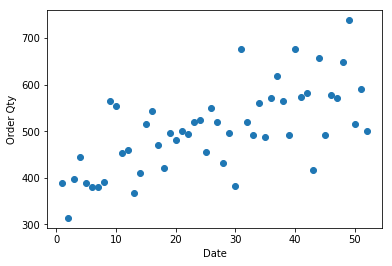

In [25]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("Order Qty")
print(X)

In [26]:
final_df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52],
           dtype='int64')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_test, X_train)

[[20]
 [42]
 [48]
 [13]
 [44]
 [ 6]
 [18]
 [51]
 [ 4]
 [33]
 [14]
 [ 9]
 [27]] [[ 7]
 [35]
 [ 5]
 [38]
 [25]
 [45]
 [34]
 [50]
 [16]
 [10]
 [17]
 [31]
 [37]
 [26]
 [12]
 [ 1]
 [47]
 [28]
 [32]
 [40]
 [30]
 [46]
 [ 2]
 [22]
 [ 3]
 [41]
 [36]
 [24]
 [49]
 [11]
 [23]
 [19]
 [52]
 [21]
 [ 8]
 [43]
 [15]
 [29]
 [39]]


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [29]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
predicted
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3501.0476365081927
R-squared (R2 ): 0.6063013847058527


In [39]:
#print(predicted)
new_p = model.predict([[54]])
print(new_p)

[[602.61671987]]


In [45]:
to_predict = list()
for i in range(53, 60):
    to_predict.append([i])
    
print(to_predict)    

[[53], [54], [55], [56], [57], [58], [59]]


In [46]:
predicted = model.predict(to_predict)
predicted

array([[598.97807079],
       [602.61671987],
       [606.25536895],
       [609.89401803],
       [613.5326671 ],
       [617.17131618],
       [620.80996526]])

In [48]:
single_col.describe()

,Order Qty
count,52.000000
mean,504.115385
std,90.261636
min,314.000000
25%,441.750000
50%,498.500000
75%,564.250000
max,738.000000


In [50]:
revised_df.describe()

,Order Qty,Order Price,Extended Amount
count,4213.000000,4213.000000,4213.000000
mean,6.260385,9.160479,33.665297
std,6.501723,14.113617,47.539795
min,1.000000,3.953000,3.953500
25%,3.000000,3.953500,15.814000
50%,5.000000,3.953500,23.721000
75%,8.000000,3.953500,47.442000
max,180.000000,47.442200,711.633000
